#### **Exercise 1:**

Last week, we started looking at the Titanic data.  Load that data again. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.  For those that seem important, use a `SimpleImputer` to impute the data.

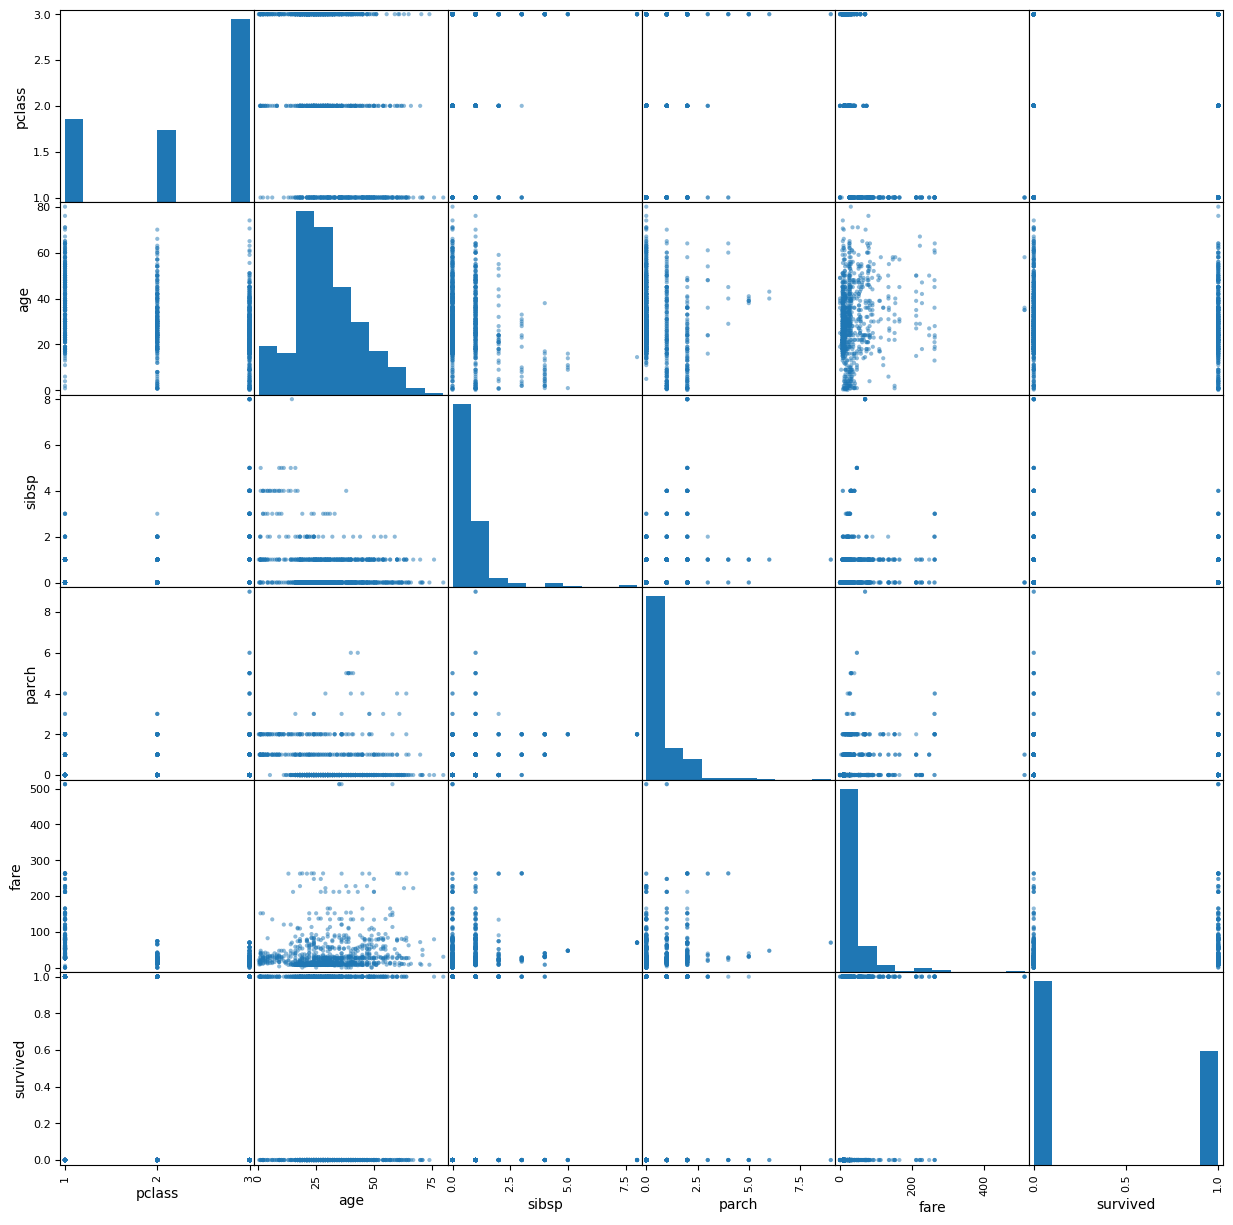

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("data/titanic.csv")
pd.plotting.scatter_matrix(data,figsize=(15,15))
plt.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


<Axes: >

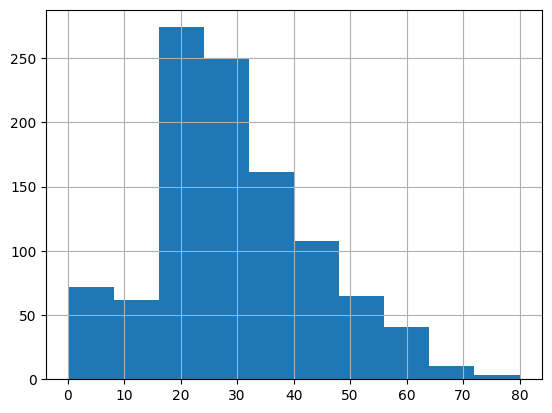

In [4]:
data.age.hist()

<Axes: >

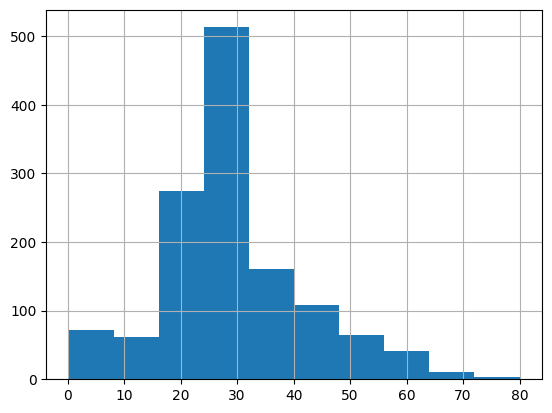

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(data[['age']])

data['age']=X[:,0]
data.age.hist()


In [19]:
imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(data[['embarked']])

data['embarked']=X[:,0]

In [7]:
data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [9]:
data = data.drop(['cabin','fare','ticket','name'],axis=1)

In [20]:
data

,pclass,sex,age,sibsp,parch,embarked,survived
0,1,0.0,29.0000,0,0,S,1
1,1,1.0,0.9167,1,2,S,1
2,1,0.0,2.0000,1,2,S,0
3,1,1.0,30.0000,1,2,S,0
4,1,0.0,25.0000,1,2,S,0
...,...,...,...,...,...,...,...
1304,3,0.0,14.5000,1,0,C,0
1305,3,0.0,28.0000,1,0,C,0
1306,3,1.0,26.5000,0,0,C,0
1307,3,1.0,27.0000,0,0,C,0


In [21]:
ohe = OneHotEncoder(drop="first",sparse_output=False)
ohe.fit_transform(data[['embarked']])
ohe.get_feature_names_out()

array(['embarked_Q', 'embarked_S'], dtype=object)

#### **Exercise 2**

Sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first",sparse_output=False)
data['sex'] = ohe.fit_transform(data[['sex']])

In [22]:
ohe = OneHotEncoder(drop="first",sparse_output=False)
X = ohe.fit_transform(data[['embarked']])
data[ohe.get_feature_names_out()] = X

In [25]:
data = data.drop("embarked",axis=1)

#### **Exercise 3**

Using 5-fold cross-validation, examine the performance of a LogisticRegression classifier. 

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
lm = LogisticRegression()
X = data.drop("survived",axis=1)
y = data.survived

result=cross_val_score(lm,X=X,y=y,cv=5)
np.mean(result)

/Users/jeintron/Dropbox/@TEACHING/2024/FALL/teaching-venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


np.float64(0.7203591588429703)

#### **Exercise 4**

Replace the logistic regression classifier with a decision tree classifier.  Which works better?  Why do you think that is?

In [27]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
dt = DecisionTreeClassifier()
result = cross_val_score(dt,X=X,y=y,cv=5)
np.mean(result)

np.float64(0.6287414816764645)

#### **Exercise 5:** 

See if you can get the decision tree classifier to perform better.  You might try:

- Making sure you use the "fare" column.  
- Using a smarter imputation mechanism for your columns (try figuring out the KNNImputer)
- Modifying the DecisionTreeAlgorithm parameters

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("data/titanic.csv")
data


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [29]:
data_cleaned = data.drop(['cabin','name','ticket'],axis=1)

In [31]:
data_cleaned

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,0
1305,3,female,NaN,1,0,14.4542,C,0
1306,3,male,26.5000,0,0,7.2250,C,0
1307,3,male,27.0000,0,0,7.2250,C,0


In [37]:

oe.fit_transform(data_cleaned[['sex']])

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [39]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
oe = OneHotEncoder(drop="first",sparse_output = False)
data_cleaned['sex'] = oe.fit_transform(data_cleaned[['sex']])

ord_e = OrdinalEncoder()
data_cleaned['embarked'] = ord_e.fit_transform(data_cleaned[['embarked']])

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   sex       1309 non-null   float64
 2   age       1046 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1308 non-null   float64
 6   embarked  1307 non-null   float64
 7   survived  1309 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 81.9 KB


In [40]:
from sklearn.impute import KNNImputer
ki = KNNImputer()

X = ki.fit_transform(data_cleaned)


In [42]:
data_imputed = pd.DataFrame(X,columns=ki.get_feature_names_out())
data_imputed

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1.0,0.0,29.0000,0.0,0.0,211.3375,2.0,1.0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,2.0,1.0
2,1.0,0.0,2.0000,1.0,2.0,151.5500,2.0,0.0
3,1.0,1.0,30.0000,1.0,2.0,151.5500,2.0,0.0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,2.0,0.0
...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.5000,1.0,0.0,14.4542,0.0,0.0
1305,3.0,0.0,20.1000,1.0,0.0,14.4542,0.0,0.0
1306,3.0,1.0,26.5000,0.0,0.0,7.2250,0.0,0.0
1307,3.0,1.0,27.0000,0.0,0.0,7.2250,0.0,0.0


In [47]:
oh2 = OneHotEncoder(drop="first",sparse_output=False)
data_imputed[oh2.get_feature_names_out()] = oh2.fit_transform(data_imputed[['embarked']])
data_final = data_imputed.drop("embarked",axis=1)
data_final

,pclass,sex,age,sibsp,parch,fare,survived,embarked_0.8,embarked_1.0,embarked_2.0
0,1.0,0.0,29.0000,0.0,0.0,211.3375,1.0,0.0,0.0,1.0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1.0,0.0,0.0,1.0
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0.0,0.0,0.0,1.0
3,1.0,1.0,30.0000,1.0,2.0,151.5500,0.0,0.0,0.0,1.0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.5000,1.0,0.0,14.4542,0.0,0.0,0.0,0.0
1305,3.0,0.0,20.1000,1.0,0.0,14.4542,0.0,0.0,0.0,0.0
1306,3.0,1.0,26.5000,0.0,0.0,7.2250,0.0,0.0,0.0,0.0
1307,3.0,1.0,27.0000,0.0,0.0,7.2250,0.0,0.0,0.0,0.0


In [48]:
dt = DecisionTreeClassifier()
X = data_final.drop("survived",axis=1)
y = data_final.survived

result=cross_val_score(dt,X=X,y=y,cv=5)
np.mean(result)


np.float64(0.6554970606299904)

Slightly better!  But still, not awesome.

#### **Exercise 6:**

Try using a `GridSearchCV` to optimize the DecisionTree algorithm.  What is the best performance you can achieve?